# RETAIL PRICE OPTIMIZATION

## Problem Statement

Our task is to develop a model that predicts the optimal price for a product based on various factors. This prediction would enable us to make an informed decision when pricing a product, leading to maximized sales and customer satisfaction.

The dataset's diverse features like product details, order details, pricing, competition, time etc provide a comprehensive view for our price optimization task.

By analyzing this information, we aim to predict the optimal price for retail products. This would aid in making strategic pricing decisions, thereby optimizing retail prices effectively.

## About Dataset

The sample dataset includes various details,such as:

1.  product_id: A unique identifier for each product in the dataset.
2.  product_category_name: The name of the product category to which the product belongs.
3.  month_year: The month and year of the retail transaction or data recording.
4.  qty: The quantity of the product sold or purchased in a given transaction.
5.  total_price: The total price of the product, including any applicable taxes or discounts.
6.  freight_price: The cost of shipping or freight associated with the product.
7.  unit_price: The price of a single unit of the product.
8.  product_name_length: The length of the product name in terms of the number of characters.
9.  product_description_length: The length of the product description in terms of the number of characters.
10. product_photos_qty: The number of photos available for the product in the dataset.
11. product_weight_g: The weight of the product in grams.
12. product_score: A score or rating associated with the product’s quality, popularity, or other relevant factors.
13. customers: The number of customers who purchased the product in a given transaction.
14. weekday: The day of the week on which the transaction occurred.
15. weekend: A binary flag indicating whether the transaction occurred on a weekend (1) or not (0).
16. holiday: A binary flag indicating whether the transaction occurred on a holiday (1) or not (0).
17. month: The month in which the transaction occurred.
18. year: The year in which the transaction occurred.
19. s: the effect of seasonality
20. comp_1, comp_2, comp_3: Competitor information or variables related to competitors’ prices, promotions, or other relevant       factors.
21. ps1, ps2, ps3: Product score or rating associated with competitors’ products.
22. fp1, fp2, fp3: Freight or shipping cost associated with competitors’ products.

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Dataset

In [2]:
retail_data = pd.read_csv('retail_price.csv')
retail_data.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


## Descriptive Statistics

In [6]:
retail_data.shape

(676, 30)

Total no. of rows = 676, Total no. of columns = 30

In [7]:
#dataset summary
retail_data.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


In [8]:
#descriptive summary of dataset
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [9]:
#checking for null values
retail_data.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [5]:
retail_data.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [11]:
retail_data.nunique()

product_id                     52
product_category_name           9
month_year                     20
qty                            66
total_price                   573
freight_price                 653
unit_price                    280
product_name_lenght            24
product_description_lenght     46
product_photos_qty              7
product_weight_g               45
product_score                  11
customers                      94
weekday                         4
weekend                         3
holiday                         5
month                          12
year                            2
s                             450
volume                         40
comp_1                         88
ps1                             9
fp1                           179
comp_2                        123
ps2                            10
fp2                           242
comp_3                        105
ps3                             9
fp3                           229
lag_price     

In [4]:
retail_data_cleaned = retail_data.copy(deep = True)

## Analysis

In [6]:
retail_data_cleaned.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


<AxesSubplot:xlabel='total_price', ylabel='Count'>

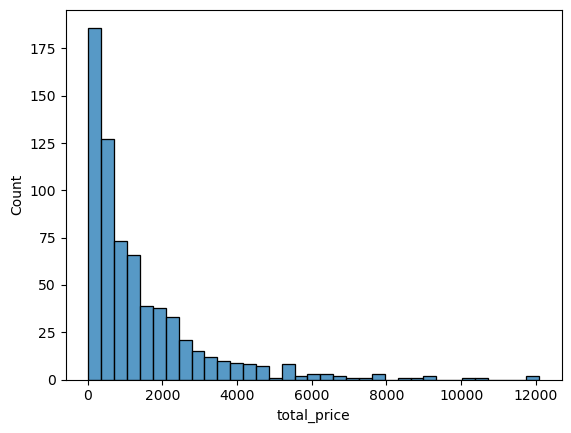

In [16]:
sns.histplot(retail_data_cleaned['total_price'])

Most of the products total price is less than 2000

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='unit_price'>

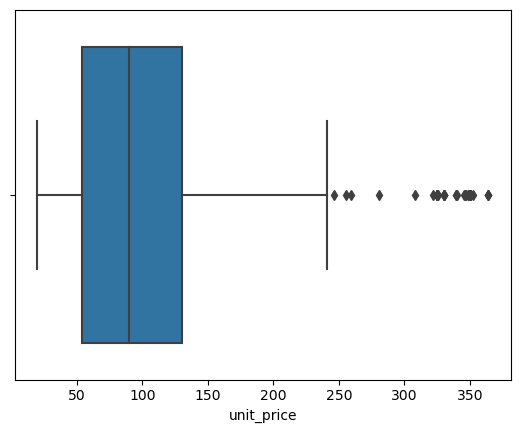

In [21]:
sns.boxplot(retail_data_cleaned['unit_price'])

<AxesSubplot:xlabel='qty', ylabel='Count'>

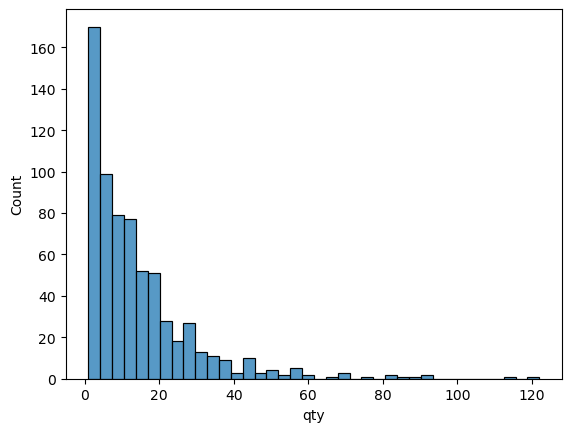

In [24]:
sns.histplot(retail_data_cleaned['qty'])

<AxesSubplot:xlabel='product_weight_g', ylabel='Count'>

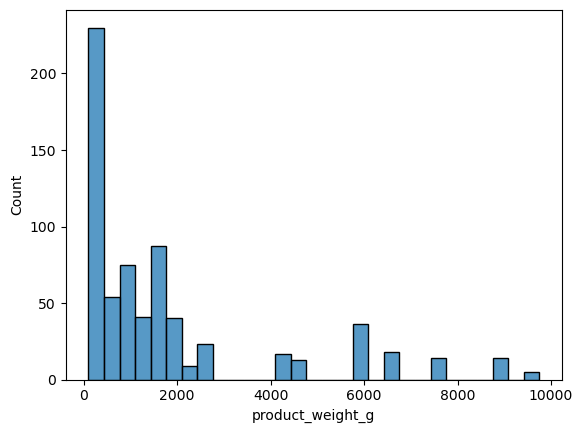

In [25]:
sns.histplot(retail_data_cleaned['product_weight_g'])

<AxesSubplot:xlabel='qty', ylabel='total_price'>

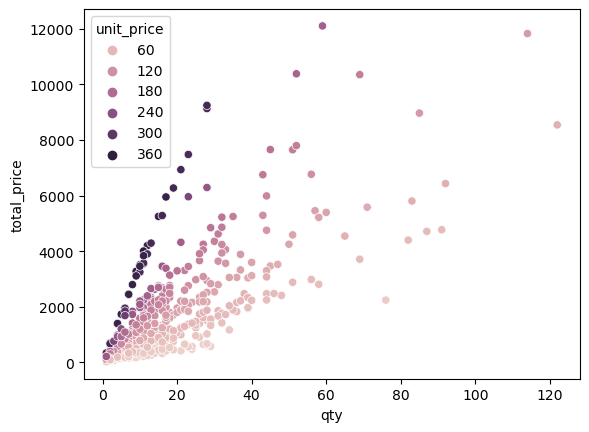

In [36]:
sns.scatterplot(data=retail_data_cleaned, y='total_price', x='qty', hue='unit_price')

<AxesSubplot:xlabel='qty', ylabel='total_price'>

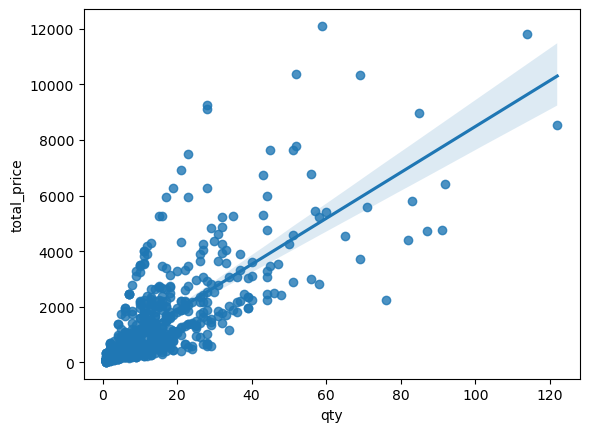

In [37]:
sns.regplot(data=retail_data_cleaned, y='total_price', x='qty')

[Text(0, 0, 'bed_bath_table'),
 Text(1, 0, 'garden_tools'),
 Text(2, 0, 'consoles_games'),
 Text(3, 0, 'health_beauty'),
 Text(4, 0, 'cool_stuff'),
 Text(5, 0, 'perfumery'),
 Text(6, 0, 'computers_accessories'),
 Text(7, 0, 'watches_gifts'),
 Text(8, 0, 'furniture_decor')]

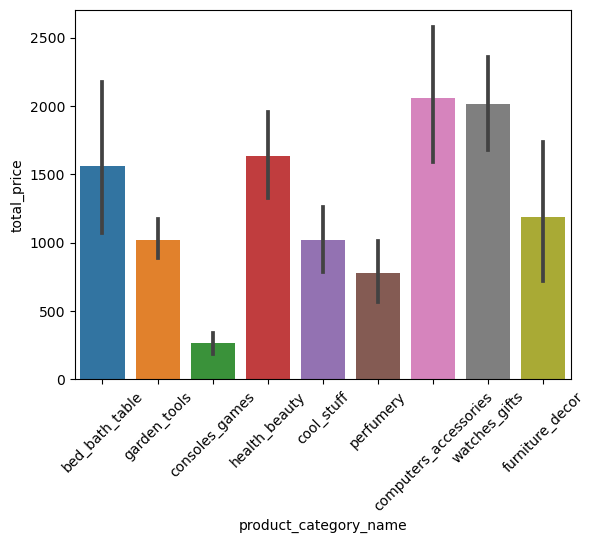

In [14]:
my_plot= sns.barplot(data=retail_data_cleaned, x='product_category_name', y='total_price')

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

Computer accessories and watch gifts have highest total price

[Text(0, 0, 'bed_bath_table'),
 Text(1, 0, 'garden_tools'),
 Text(2, 0, 'consoles_games'),
 Text(3, 0, 'health_beauty'),
 Text(4, 0, 'cool_stuff'),
 Text(5, 0, 'perfumery'),
 Text(6, 0, 'computers_accessories'),
 Text(7, 0, 'watches_gifts'),
 Text(8, 0, 'furniture_decor')]

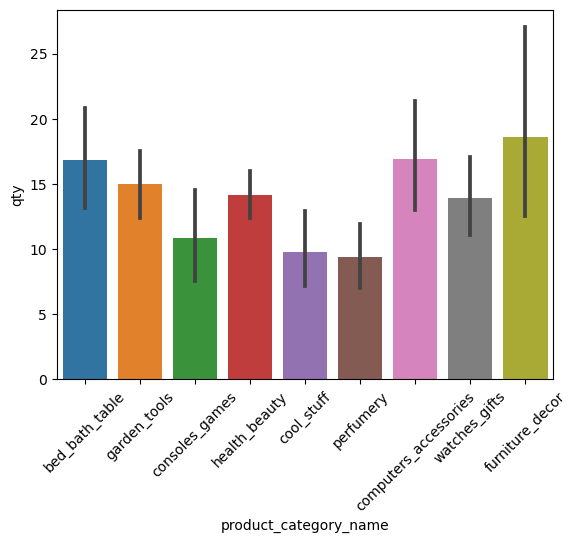

In [15]:
my_plot= sns.barplot(data=retail_data_cleaned, x='product_category_name', y='qty')

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

[Text(0, 0, 'bed_bath_table'),
 Text(1, 0, 'garden_tools'),
 Text(2, 0, 'consoles_games'),
 Text(3, 0, 'health_beauty'),
 Text(4, 0, 'cool_stuff'),
 Text(5, 0, 'perfumery'),
 Text(6, 0, 'computers_accessories'),
 Text(7, 0, 'watches_gifts'),
 Text(8, 0, 'furniture_decor')]

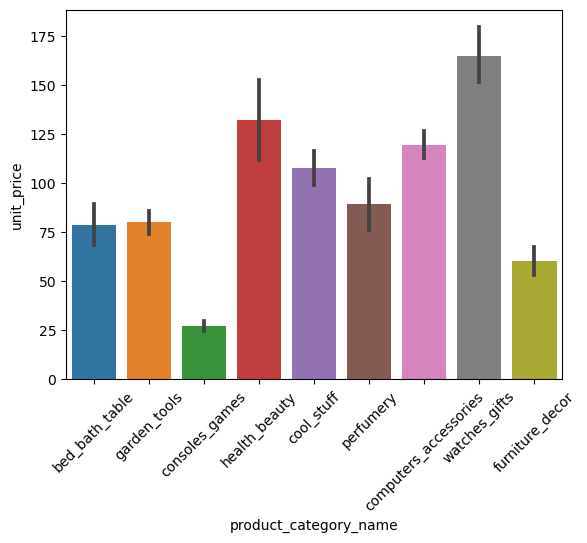

In [12]:
my_plot= sns.barplot(data=retail_data_cleaned, x='product_category_name', y='unit_price')

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

Watch gifts have highest unit price

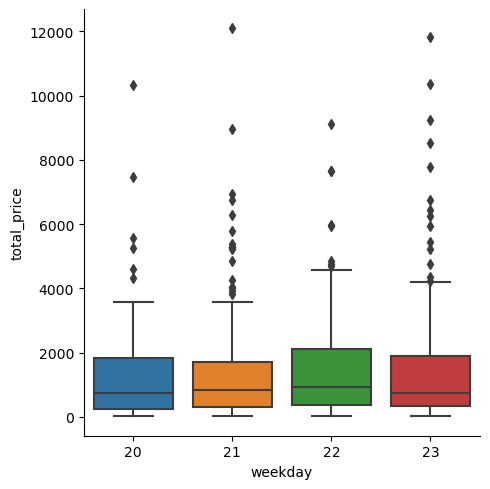

In [40]:
sns.catplot(data=retail_data_cleaned, y='total_price', x='weekday', kind ='box')

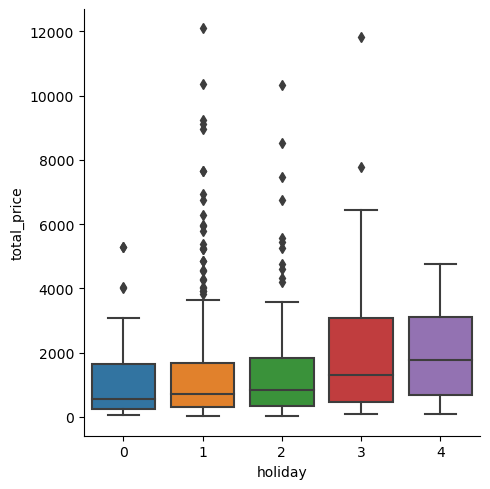

In [18]:
sns.catplot(data=retail_data_cleaned, y='total_price', x='holiday', kind ='box')

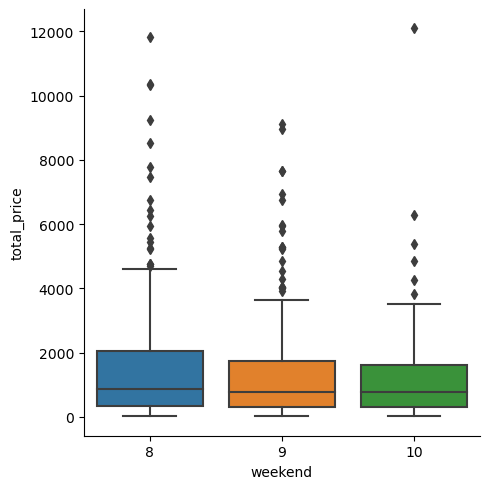

In [19]:
sns.catplot(data=retail_data_cleaned, y='total_price', x='weekend', kind ='box')   # no of weekend days

In [8]:
retail_data_cleaned.sort_values('total_price', ascending=False).head(15)  #highest price

,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
673,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,9750,...,89.900000,3.9,13.993833,205.000000,4.4,22.195932,45.950000,4.0,14.840000,209.000000
277,watches_gifts,01-05-2018,114,11820.20,0.095439,103.792523,33,523,3,584,...,103.792523,4.2,0.095439,105.000000,4.2,11.377297,132.531250,3.8,15.762187,105.648625
674,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,9750,...,89.900000,3.9,14.656757,199.509804,4.4,19.412885,45.950000,4.0,14.287500,205.000000
175,computers_accessories,01-02-2018,69,10343.10,26.552899,149.900000,48,894,1,533,...,149.000000,4.2,41.163226,149.900000,4.3,26.552899,78.712281,3.5,14.535915,150.354546
549,health_beauty,01-08-2018,28,9240.00,20.505357,330.000000,60,2644,6,400,...,23.990000,4.3,16.770000,82.821429,4.1,12.418571,58.990000,3.9,12.083333,330.000000
544,health_beauty,01-03-2018,28,9125.00,19.370357,325.892857,60,2644,6,400,...,23.990000,4.3,14.198750,83.740000,4.1,11.876875,58.990000,3.9,15.228000,325.000000
276,watches_gifts,01-04-2018,85,8961.49,2.181647,105.648625,33,523,3,584,...,105.648625,4.2,2.181647,105.000000,4.2,13.631429,150.133333,3.8,19.447778,117.441290
499,furniture_decor,01-01-2018,122,8538.00,17.663115,69.995327,44,903,6,2600,...,69.995327,4.1,17.663115,38.400000,3.7,9.340000,99.900000,4.4,22.819231,75.000000
178,computers_accessories,01-05-2018,52,7794.80,18.943077,149.900000,48,894,1,533,...,119.000000,4.2,39.217200,149.900000,4.3,18.943077,79.800000,3.5,14.414545,149.900000
612,watches_gifts,01-07-2018,45,7651.27,17.953556,169.349318,46,501,4,363,...,118.363636,4.2,15.480000,105.000000,4.2,24.938750,155.000000,3.8,16.470000,245.900000


In [9]:
retail_data_cleaned.sort_values('total_price', ascending=True).head(15) #lowest price

,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
329,consoles_games,01-07-2017,1,19.90,11.85,19.90,56,237,3,100,...,19.900000,4.2,13.473077,19.900000,3.9,11.850000,19.900000,3.9,11.850000,19.850000
281,cool_stuff,01-09-2017,1,29.50,11.73,29.50,57,787,8,1867,...,99.990000,4.2,15.933333,29.500000,4.4,11.730000,29.500000,4.4,11.730000,29.450000
623,health_beauty,01-10-2017,1,29.90,11.85,29.90,55,388,1,250,...,23.990000,4.3,13.136667,89.990000,4.1,16.562917,58.990000,3.9,19.065263,29.850000
336,consoles_games,01-02-2018,1,32.50,11.85,32.50,56,237,3,100,...,32.500000,4.2,15.256000,32.500000,3.9,11.850000,32.500000,3.9,11.850000,27.033333
468,furniture_decor,01-08-2018,1,35.00,19.44,35.00,41,789,1,950,...,103.233333,4.1,22.300000,35.000000,3.7,15.628125,83.833333,4.4,23.776667,34.950000
41,consoles_games,01-07-2018,1,36.20,22.18,36.20,49,100,4,150,...,36.200000,4.2,22.180000,36.200000,4.2,22.180000,36.200000,4.2,22.180000,36.200000
524,furniture_decor,01-07-2017,1,38.40,7.78,38.40,49,829,1,850,...,75.000000,4.1,15.856000,38.400000,3.7,7.780000,38.400000,3.7,7.780000,38.350000
457,furniture_decor,01-08-2017,1,38.40,11.85,38.40,41,789,1,950,...,75.000000,4.1,15.376923,38.400000,3.7,12.105000,38.400000,3.8,11.850000,38.350000
0,bed_bath_table,01-05-2017,1,45.95,15.10,45.95,39,161,2,350,...,89.900000,3.9,15.011897,215.000000,4.4,8.760000,45.950000,4.0,15.100000,45.900000
75,health_beauty,01-08-2018,2,47.98,16.77,23.99,48,575,1,100,...,23.990000,4.3,16.770000,82.821429,4.1,12.418571,58.990000,3.9,12.083333,23.990000


<AxesSubplot:>

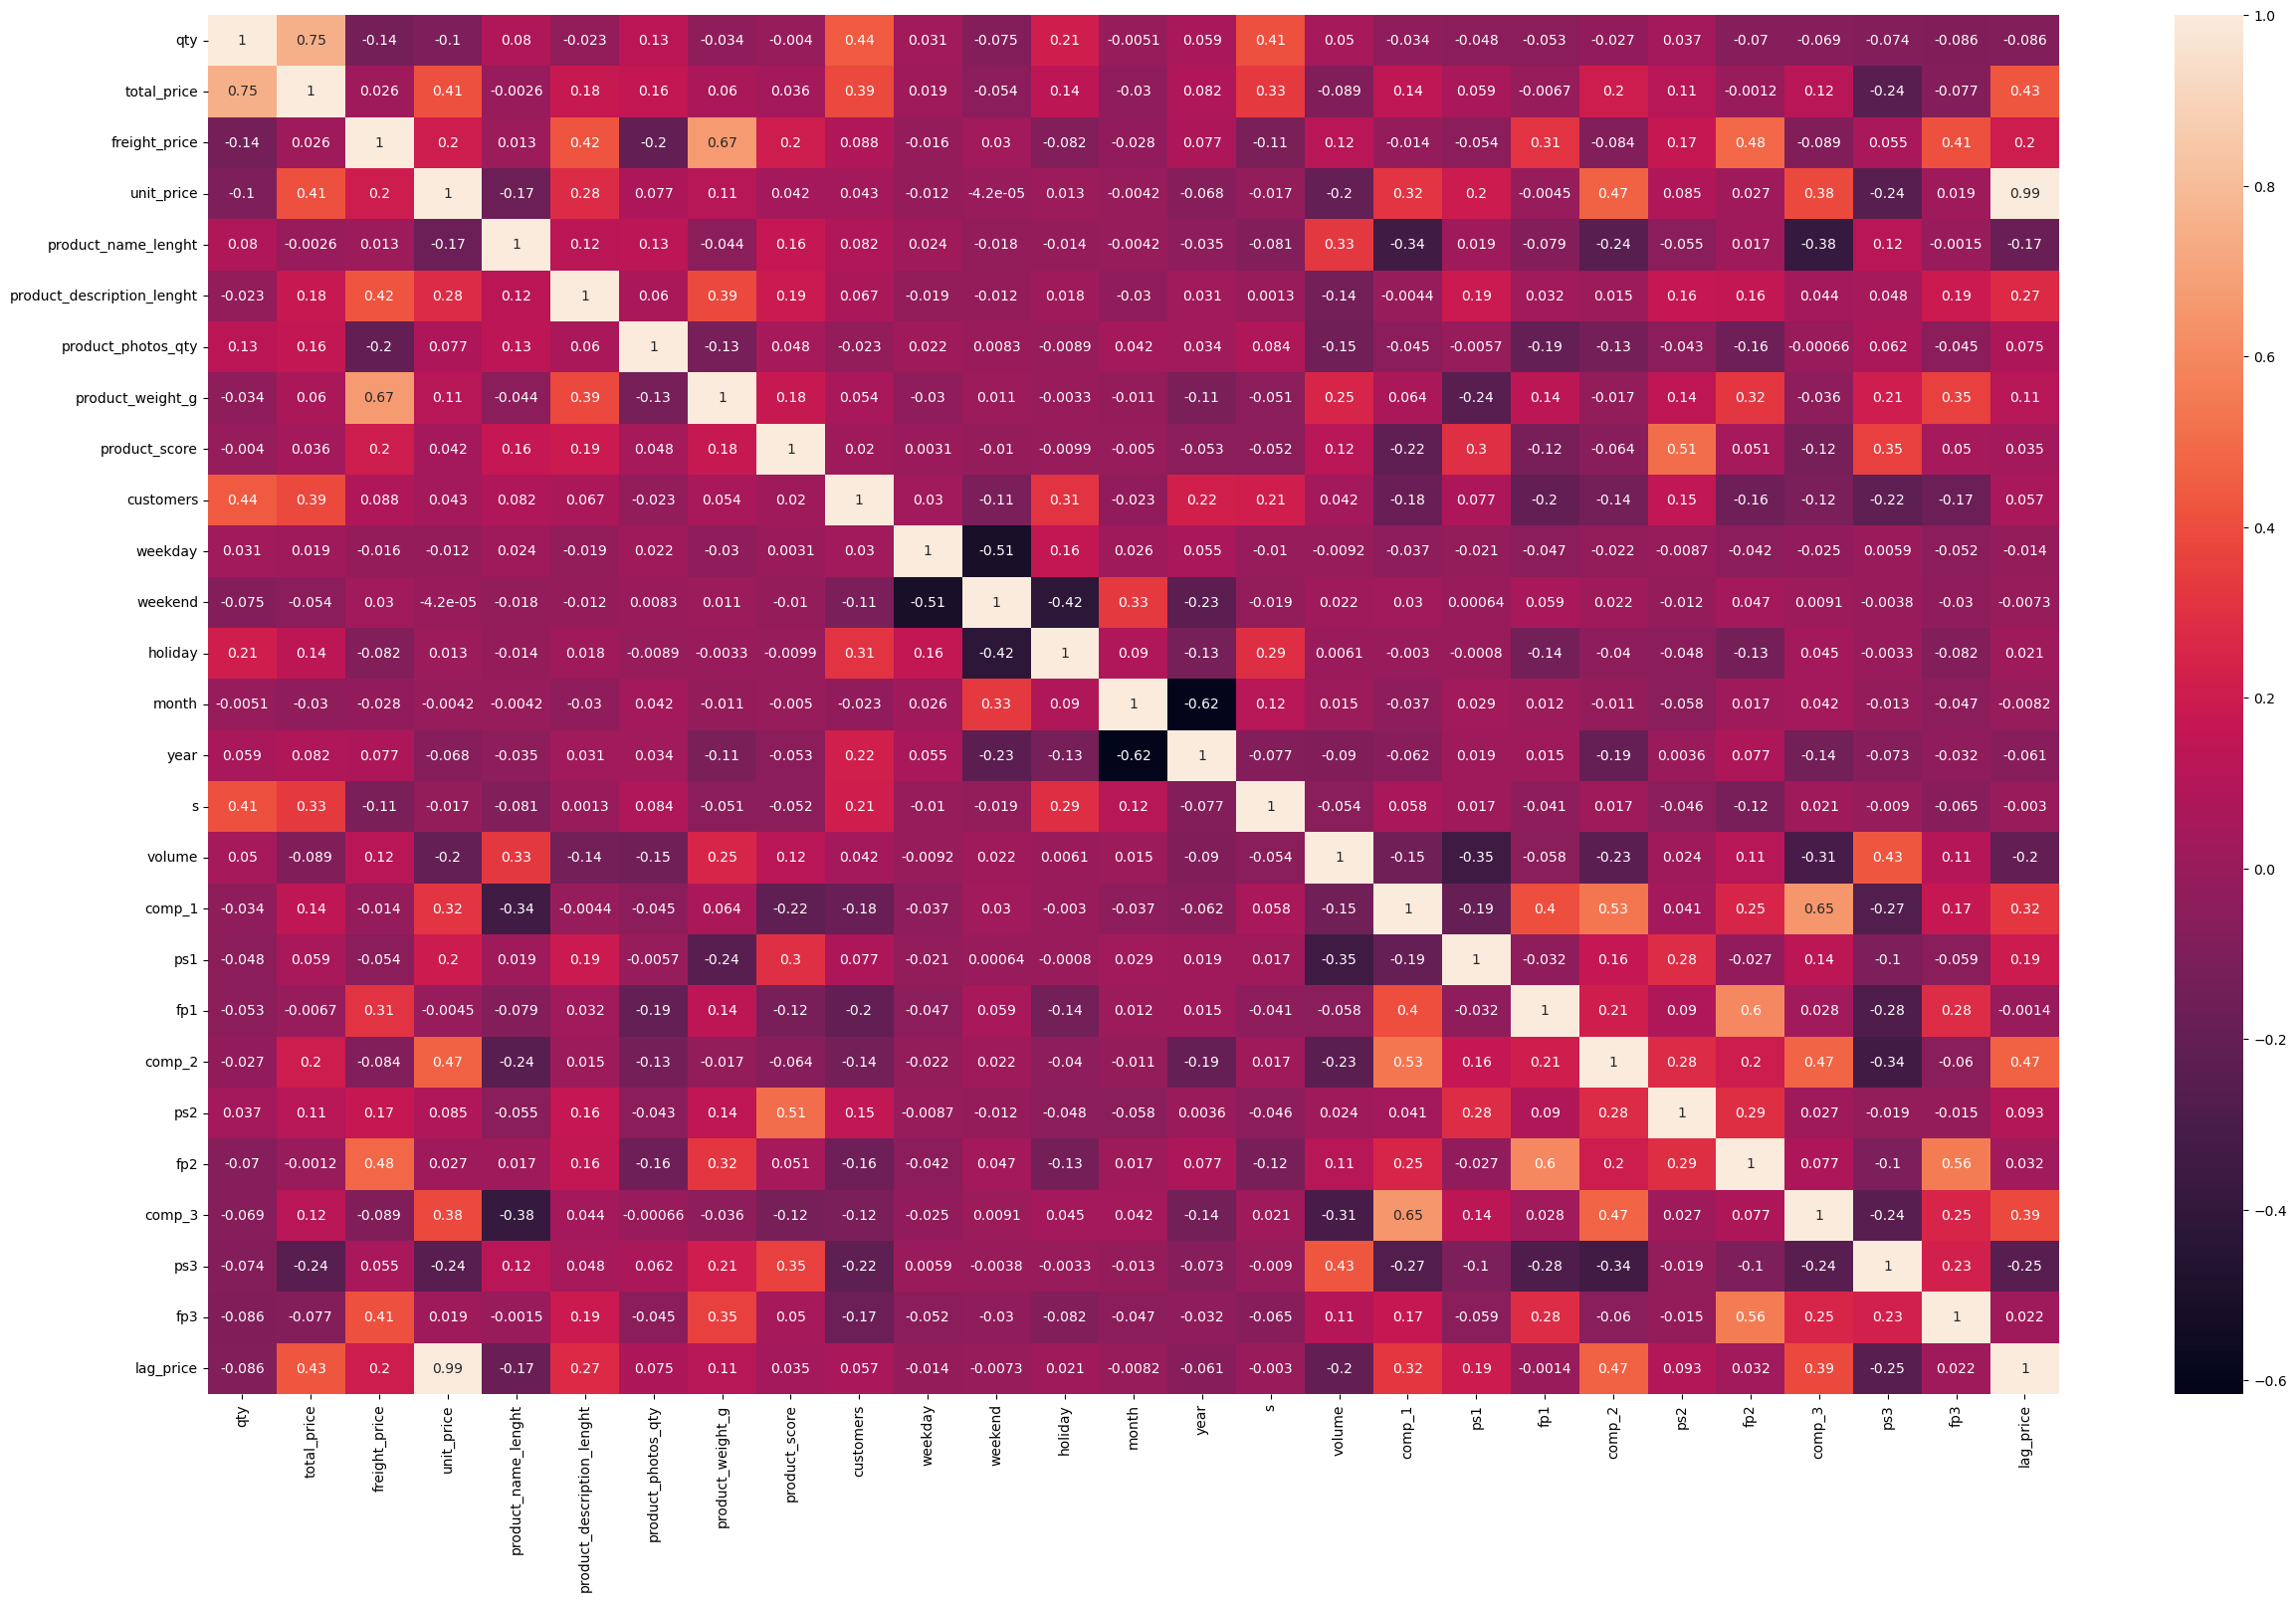

In [10]:
plt.figure(figsize=(30,18))
sns.heatmap(retail_data_cleaned.corr(),annot=True)

In [5]:
retail_data_cleaned[['unit_price', 'comp_1', 'comp_2', 'comp_3']].median()

unit_price    89.90
comp_1        69.90
comp_2        89.99
comp_3        59.90
dtype: float64

Comparison with Competitor Products
As mentioned previously, competitor analysis is quite essential. Therefore, we compare the unit and shipping prices of every product to those of 3 different competitors.

For this, we simply calculate the difference between each pair

In [6]:
retail_data_cleaned['comp1_diff'] = retail_data_cleaned['unit_price'] - retail_data_cleaned['comp_1']
retail_data_cleaned['comp2_diff'] = retail_data_cleaned['unit_price'] - retail_data_cleaned['comp_2']
retail_data_cleaned['comp3_diff'] = retail_data_cleaned['unit_price'] - retail_data_cleaned['comp_3']

retail_data_cleaned.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,comp1_diff,comp2_diff,comp3_diff
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90,-43.95,-169.050000,0.0
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95,-43.95,-163.050000,0.0
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95,-43.95,-159.050000,0.0
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95,-43.95,-153.559804,0.0
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95,-43.95,-117.448710,0.0


[Text(0, 0, 'bed_bath_table'),
 Text(1, 0, 'garden_tools'),
 Text(2, 0, 'consoles_games'),
 Text(3, 0, 'health_beauty'),
 Text(4, 0, 'cool_stuff'),
 Text(5, 0, 'perfumery'),
 Text(6, 0, 'computers_accessories'),
 Text(7, 0, 'watches_gifts'),
 Text(8, 0, 'furniture_decor')]

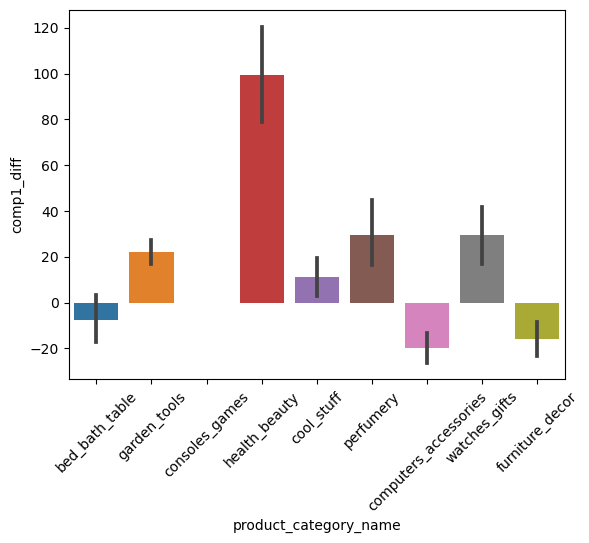

In [8]:
my_plot= sns.barplot(data=retail_data_cleaned, x='product_category_name', y='comp1_diff')

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

[Text(0, 0, 'bed_bath_table'),
 Text(1, 0, 'garden_tools'),
 Text(2, 0, 'consoles_games'),
 Text(3, 0, 'health_beauty'),
 Text(4, 0, 'cool_stuff'),
 Text(5, 0, 'perfumery'),
 Text(6, 0, 'computers_accessories'),
 Text(7, 0, 'watches_gifts'),
 Text(8, 0, 'furniture_decor')]

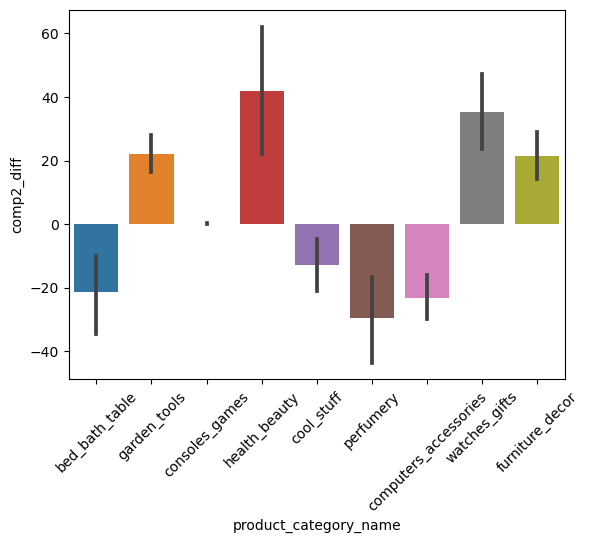

In [14]:
my_plot= sns.barplot(data=retail_data_cleaned, x='product_category_name', y='comp2_diff')

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

[Text(0, 0, 'bed_bath_table'),
 Text(1, 0, 'garden_tools'),
 Text(2, 0, 'consoles_games'),
 Text(3, 0, 'health_beauty'),
 Text(4, 0, 'cool_stuff'),
 Text(5, 0, 'perfumery'),
 Text(6, 0, 'computers_accessories'),
 Text(7, 0, 'watches_gifts'),
 Text(8, 0, 'furniture_decor')]

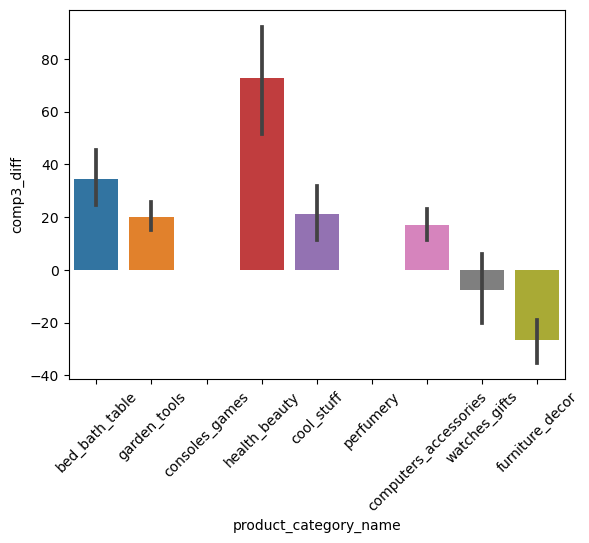

In [15]:
my_plot= sns.barplot(data=retail_data_cleaned, x='product_category_name', y='comp3_diff')

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

Freight Price

In [7]:
retail_data_cleaned['fp1_diff'] = retail_data_cleaned['freight_price'] - retail_data_cleaned['fp1']
retail_data_cleaned['fp2_diff'] = retail_data_cleaned['freight_price'] - retail_data_cleaned['fp2']
retail_data_cleaned['fp3_diff'] = retail_data_cleaned['freight_price'] - retail_data_cleaned['fp3']

[Text(0, 0, 'bed_bath_table'),
 Text(1, 0, 'garden_tools'),
 Text(2, 0, 'consoles_games'),
 Text(3, 0, 'health_beauty'),
 Text(4, 0, 'cool_stuff'),
 Text(5, 0, 'perfumery'),
 Text(6, 0, 'computers_accessories'),
 Text(7, 0, 'watches_gifts'),
 Text(8, 0, 'furniture_decor')]

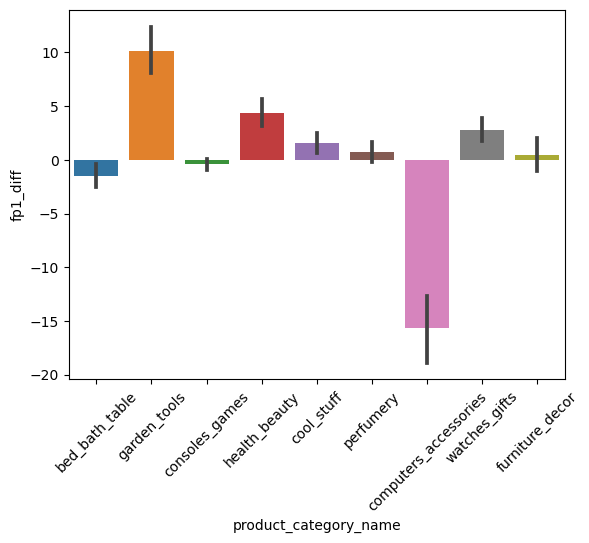

In [17]:
my_plot= sns.barplot(data=retail_data_cleaned, x='product_category_name', y='fp1_diff')

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

[Text(0, 0, 'bed_bath_table'),
 Text(1, 0, 'garden_tools'),
 Text(2, 0, 'consoles_games'),
 Text(3, 0, 'health_beauty'),
 Text(4, 0, 'cool_stuff'),
 Text(5, 0, 'perfumery'),
 Text(6, 0, 'computers_accessories'),
 Text(7, 0, 'watches_gifts'),
 Text(8, 0, 'furniture_decor')]

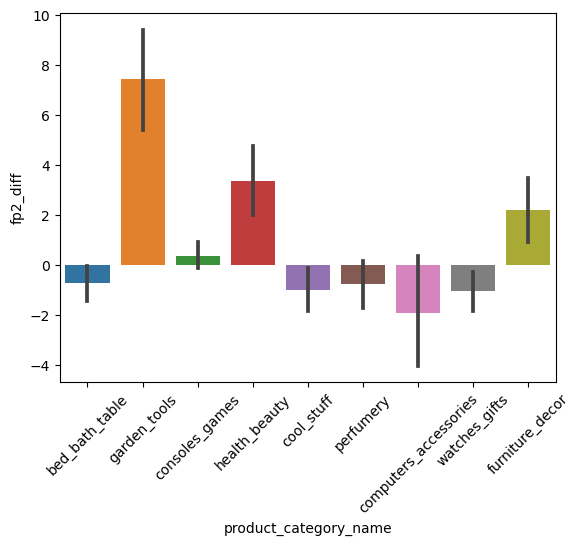

In [18]:
my_plot= sns.barplot(data=retail_data_cleaned, x='product_category_name', y='fp2_diff')

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

[Text(0, 0, 'bed_bath_table'),
 Text(1, 0, 'garden_tools'),
 Text(2, 0, 'consoles_games'),
 Text(3, 0, 'health_beauty'),
 Text(4, 0, 'cool_stuff'),
 Text(5, 0, 'perfumery'),
 Text(6, 0, 'computers_accessories'),
 Text(7, 0, 'watches_gifts'),
 Text(8, 0, 'furniture_decor')]

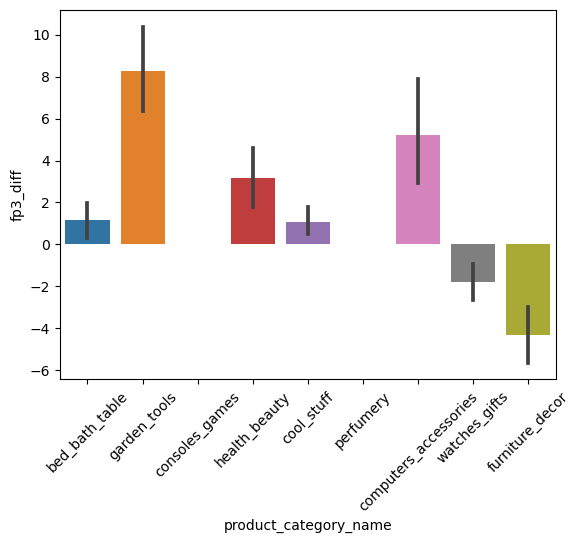

In [19]:
my_plot= sns.barplot(data=retail_data_cleaned, x='product_category_name', y='fp3_diff')

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

In [22]:
corrs = retail_data_cleaned.corr()['unit_price'].sort_values(ascending=False)
corrs

unit_price                    1.000000
lag_price                     0.994453
comp1_diff                    0.801748
comp3_diff                    0.795389
comp2_diff                    0.771665
comp_2                        0.466459
total_price                   0.409001
comp_3                        0.383780
comp_1                        0.317113
product_description_lenght    0.280176
fp2_diff                      0.210278
fp3_diff                      0.209456
freight_price                 0.203659
ps1                           0.197425
fp1_diff                      0.182414
product_weight_g              0.112958
ps2                           0.085436
product_photos_qty            0.076990
customers                     0.043391
product_score                 0.042162
fp2                           0.026601
fp3                           0.019461
holiday                       0.012573
weekend                      -0.000042
month                        -0.004249
fp1                      

[Text(0, 0, 'unit_price'),
 Text(1, 0, 'lag_price'),
 Text(2, 0, 'comp1_diff'),
 Text(3, 0, 'comp3_diff'),
 Text(4, 0, 'comp2_diff'),
 Text(5, 0, 'comp_2'),
 Text(6, 0, 'total_price'),
 Text(7, 0, 'comp_3'),
 Text(8, 0, 'comp_1'),
 Text(9, 0, 'product_description_lenght'),
 Text(10, 0, 'fp2_diff'),
 Text(11, 0, 'fp3_diff'),
 Text(12, 0, 'freight_price'),
 Text(13, 0, 'ps1'),
 Text(14, 0, 'fp1_diff'),
 Text(15, 0, 'product_weight_g'),
 Text(16, 0, 'ps2'),
 Text(17, 0, 'product_photos_qty'),
 Text(18, 0, 'customers'),
 Text(19, 0, 'product_score'),
 Text(20, 0, 'fp2'),
 Text(21, 0, 'fp3'),
 Text(22, 0, 'holiday'),
 Text(23, 0, 'weekend'),
 Text(24, 0, 'month'),
 Text(25, 0, 'fp1'),
 Text(26, 0, 'weekday'),
 Text(27, 0, 's'),
 Text(28, 0, 'year'),
 Text(29, 0, 'qty'),
 Text(30, 0, 'product_name_lenght'),
 Text(31, 0, 'volume'),
 Text(32, 0, 'ps3')]

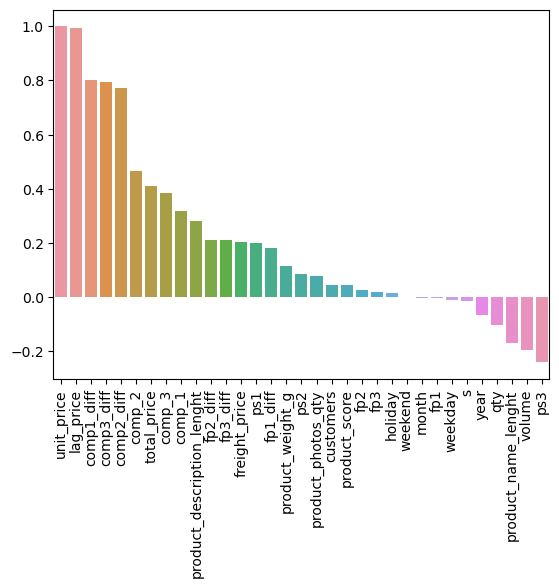

In [27]:
my_plot= sns.barplot(x=corrs.keys(), y=corrs.values)

my_plot.set_xticklabels(my_plot.get_xticklabels(),rotation=90)

Month-wise Sales Analysis
This dataset includes features that are temporal in nature. The attributes of each product (sales, quantity, etc) are shown over a span of several months. Hence, we take a look at this data aggregated across time.

In [29]:
retail_data_cleaned.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price', 'comp1_diff', 'comp2_diff',
       'comp3_diff', 'fp1_diff', 'fp2_diff', 'fp3_diff'],
      dtype='object')

In [8]:
monthly_df = retail_data_cleaned.groupby(by='month_year').agg({
    'unit_price': 'mean', 'total_price': 'sum', 'freight_price': 'sum',
    'qty': 'sum', 'weekday': 'sum', 'weekend': 'sum', 'customers': 'sum'
}).reset_index()

In [9]:
monthly_df

,month_year,unit_price,total_price,freight_price,qty,weekday,weekend,customers
0,01-01-2017,207.445000,2864.19,33.961250,9,44,18,18
1,01-01-2018,109.686025,77569.62,1005.187059,866,1104,384,4874
2,01-02-2017,127.827143,3584.11,217.847838,35,180,72,78
3,01-02-2018,107.690421,88275.95,958.114994,869,980,392,5238
4,01-03-2017,122.586615,10204.38,282.314965,101,299,104,242
5,01-03-2018,101.809616,85049.85,1181.647087,824,1100,450,5276
6,01-04-2017,119.288667,11524.62,335.440132,121,300,150,309
7,01-04-2018,101.762989,75977.18,975.096029,760,1008,432,4653
8,01-05-2017,104.785769,21843.33,393.828633,222,460,160,803
9,01-05-2018,100.167249,91223.46,653.449657,898,920,320,5294


In [10]:
monthly_df['month_year'] = pd.to_datetime(monthly_df['month_year'], format='%d-%m-%Y')
monthly_df = monthly_df.sort_values(by='month_year')
monthly_df

,month_year,unit_price,total_price,freight_price,qty,weekday,weekend,customers
0,2017-01-01,207.445000,2864.19,33.961250,9,44,18,18
2,2017-02-01,127.827143,3584.11,217.847838,35,180,72,78
4,2017-03-01,122.586615,10204.38,282.314965,101,299,104,242
6,2017-04-01,119.288667,11524.62,335.440132,121,300,150,309
8,2017-05-01,104.785769,21843.33,393.828633,222,460,160,803
10,2017-06-01,112.152081,23245.24,498.717980,233,550,200,820
12,2017-07-01,105.111896,41049.89,617.072993,403,693,330,1686
14,2017-08-01,114.737339,49550.41,670.434053,495,851,296,2279
16,2017-09-01,112.336313,44826.60,706.791687,450,756,324,2275
17,2017-10-01,113.623544,48569.38,828.531921,550,946,387,2949


<AxesSubplot:xlabel='customers', ylabel='total_price'>

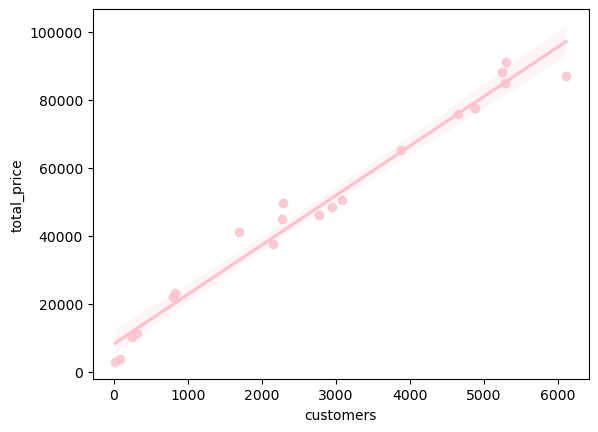

In [50]:
sns.regplot(data=monthly_df, y='total_price', x='customers', color='pink')

<AxesSubplot:xlabel='weekend', ylabel='total_price'>

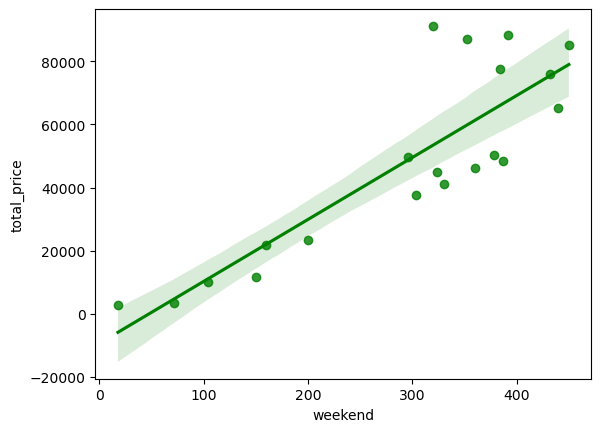

In [48]:
sns.regplot(data=monthly_df, y='total_price', x='weekend', color='Green')

[Text(0, 0, '2017-01-01T00:00:00.000000000'),
 Text(1, 0, '2017-02-01T00:00:00.000000000'),
 Text(2, 0, '2017-03-01T00:00:00.000000000'),
 Text(3, 0, '2017-04-01T00:00:00.000000000'),
 Text(4, 0, '2017-05-01T00:00:00.000000000'),
 Text(5, 0, '2017-06-01T00:00:00.000000000'),
 Text(6, 0, '2017-07-01T00:00:00.000000000'),
 Text(7, 0, '2017-08-01T00:00:00.000000000'),
 Text(8, 0, '2017-09-01T00:00:00.000000000'),
 Text(9, 0, '2017-10-01T00:00:00.000000000'),
 Text(10, 0, '2017-11-01T00:00:00.000000000'),
 Text(11, 0, '2017-12-01T00:00:00.000000000'),
 Text(12, 0, '2018-01-01T00:00:00.000000000'),
 Text(13, 0, '2018-02-01T00:00:00.000000000'),
 Text(14, 0, '2018-03-01T00:00:00.000000000'),
 Text(15, 0, '2018-04-01T00:00:00.000000000'),
 Text(16, 0, '2018-05-01T00:00:00.000000000'),
 Text(17, 0, '2018-06-01T00:00:00.000000000'),
 Text(18, 0, '2018-07-01T00:00:00.000000000'),
 Text(19, 0, '2018-08-01T00:00:00.000000000')]

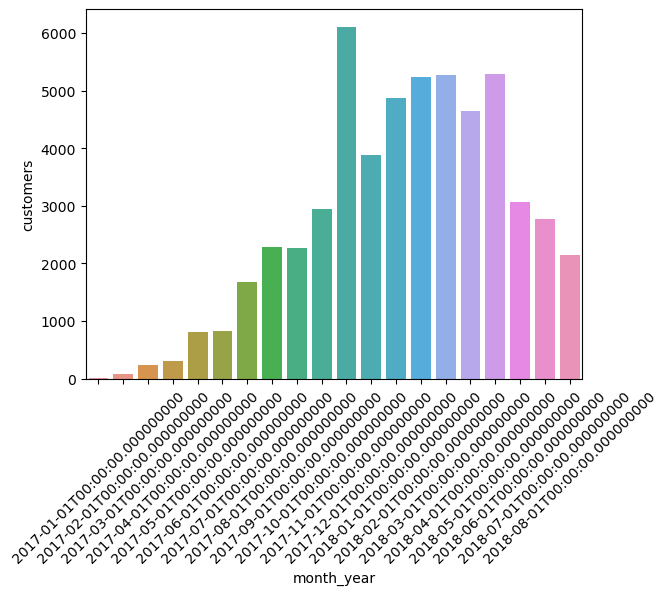

In [11]:
my_plot=sns.barplot(data=monthly_df, x='month_year', y='customers')
my_plot.set_xticklabels(my_plot.get_xticklabels(),rotation=45)

## Feature Engineering

In [12]:
cols_to_mean = ['product_id', 'month_year', 'comp1_diff', 'comp2_diff', 'comp3_diff',
                'fp1_diff', 'fp2_diff', 'fp3_diff', 'product_score', 'unit_price']
cols_to_sum = ['product_id', 'month_year', 'total_price', 'freight_price', 'customers']
mean_df = retail_data_cleaned[cols_to_mean]
sum_df = retail_data_cleaned[cols_to_sum]

In [13]:
products_mean = mean_df.groupby(by='product_id').mean()
products_sum = sum_df.groupby(by='product_id').sum()

In [14]:
retail_products = pd.concat([products_sum, products_mean], axis=1, join='inner').reset_index()
retail_products.head()

,product_id,total_price,freight_price,customers,comp1_diff,comp2_diff,comp3_diff,fp1_diff,fp2_diff,fp3_diff,product_score,unit_price
0,bed1,5831.77,240.410762,915,-43.976523,-47.634907,0.000000,-2.629416,-1.484667,0.000000,4.0,42.211989
1,bed2,42938.66,324.204152,968,0.000000,-28.547817,37.032861,0.000000,-0.989857,2.214245,3.9,86.774536
2,bed3,10304.96,172.316049,530,7.599892,0.000000,51.588471,-2.996105,0.000000,0.378738,3.3,92.101364
3,bed4,6011.77,151.576305,515,-38.826174,0.000000,6.085263,-3.644118,0.000000,-0.023987,4.2,46.725444
4,bed5,29997.36,96.015504,385,108.481703,0.000000,152.431703,3.761456,0.000000,4.750934,4.4,198.381703


## Splitting data into independent and dependent features

In [15]:
X= retail_products.drop(['product_id', 'unit_price'], axis=1)
y= retail_products['unit_price']

In [71]:
X.head()

,total_price,freight_price,customers,comp1_diff,comp2_diff,comp3_diff,fp1_diff,fp2_diff,fp3_diff,product_score
0,5831.77,240.410762,915,-43.976523,-47.634907,0.000000,-2.629416,-1.484667,0.000000,4.0
1,42938.66,324.204152,968,0.000000,-28.547817,37.032861,0.000000,-0.989857,2.214245,3.9
2,10304.96,172.316049,530,7.599892,0.000000,51.588471,-2.996105,0.000000,0.378738,3.3
3,6011.77,151.576305,515,-38.826174,0.000000,6.085263,-3.644118,0.000000,-0.023987,4.2
4,29997.36,96.015504,385,108.481703,0.000000,152.431703,3.761456,0.000000,4.750934,4.4


In [67]:
y.head()

0     42.211989
1     86.774536
2     92.101364
3     46.725444
4    198.381703
Name: unit_price, dtype: float64

## Splitting into train and test

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
y_train.shape,X_test.shape,X_train.shape,y_test.shape

((41,), (11, 10), (41, 10), (11,))

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
LR= LinearRegression()

LR.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred=LR.predict(X_test)
y_pred

array([107.19857487,  14.7994546 , 101.5890213 , 102.27634015,
       150.42083285,  54.24757321,  77.52463834, 252.43514963,
        52.99275404,  89.22950523,  97.60827542])

In [20]:
from sklearn.metrics import mean_absolute_error, r2_score


In [21]:
r2_score(y_test,y_pred)

0.7871243116387434

<AxesSubplot:xlabel='unit_price'>

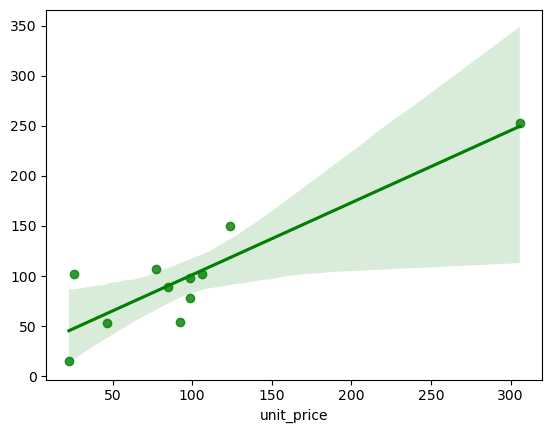

In [83]:
sns.regplot(y=y_pred, x=y_test, color='Green')

In [24]:
pred_y_df= pd.DataFrame({'Actual Value':y_test, 'Predicted Value': y_pred, 'Difference': y_test-y_pred})
pred_y_df

,Actual Value,Predicted Value,Difference
19,77.509897,107.198575,-29.688678
41,22.623745,14.799455,7.824290
47,106.264286,101.589021,4.675264
12,25.584286,102.276340,-76.692054
43,123.823010,150.420833,-26.597823
5,92.482149,54.247573,38.234575
17,98.656500,77.524638,21.131862
50,305.690296,252.435150,53.255146
3,46.725444,52.992754,-6.267310
32,84.990000,89.229505,-4.239505


In [ ]:
model = RandomForestRegressor(n_estimators=50, random_state=40)
model.fit(X, y)
y_pred = model.predict(X)

In [25]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=50, random_state=40)
model.fit(X, y)
y_pred = model.predict(X)


In [26]:
print(f"R2 score: {r2_score(y, y_pred)}")

R2 score: 0.9653993851444929


In [27]:
print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred)}")

Mean Absolute Error: 10.038151266352664


In [91]:
print(y_pred)

[107.19857487  14.7994546  101.5890213  102.27634015 150.42083285
  54.24757321  77.52463834 252.43514963  52.99275404  89.22950523
  97.60827542]


In [92]:
y

0      42.211989
1      86.774536
2      92.101364
3      46.725444
4     198.381703
5      92.482149
6      87.234536
7     143.472964
8     141.576034
9     100.243737
10    149.956818
11     28.241667
12     25.584286
13     98.362508
14    128.215962
15     42.000000
16    158.788728
17     98.656500
18     36.749231
19     77.509897
20     36.705574
21     96.156905
22    105.764478
23     55.030175
24     54.834314
25    105.374574
26     54.282197
27     94.568207
28     54.892954
29     54.962500
30    172.924867
31     55.261279
32     84.990000
33     50.541484
34    326.991758
35    117.307308
36     29.900000
37    350.744318
38     64.990000
39     60.493810
40     86.847731
41     22.623745
42     54.874615
43    123.823010
44    180.627427
45    144.785318
46     77.988095
47    106.264286
48    213.897160
49    132.530461
50    305.690296
51    184.504880
Name: unit_price, dtype: float64

## Thank You